In [2]:
import numpy as np
import theano.tensor as T
import tensorflow as tf
import keras
import keras.backend as K
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Using TensorFlow backend.


5


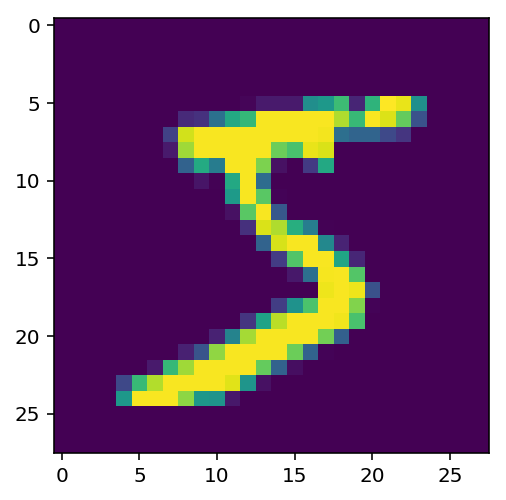

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(y_train[0])
plt.imshow(x_train[0]);

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
img_rows, img_cols = 28, 28
num_classes = 10

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(4, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [80]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [81]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=12,
                    verbose=1, 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 28s - loss: 0.5855 - acc: 0.8124 - val_loss: 0.1492 - val_acc: 0.9547
Epoch 2/12
60000/60000 [==============================] - 28s - loss: 0.2055 - acc: 0.9382 - val_loss: 0.0999 - val_acc: 0.9681
Epoch 3/12
60000/60000 [==============================] - 29s - loss: 0.1592 - acc: 0.9529 - val_loss: 0.0823 - val_acc: 0.9733
Epoch 4/12
60000/60000 [==============================] - 31s - loss: 0.1393 - acc: 0.9578 - val_loss: 0.0696 - val_acc: 0.9779
Epoch 5/12
60000/60000 [==============================] - 41s - loss: 0.1238 - acc: 0.9629 - val_loss: 0.0642 - val_acc: 0.9798
Epoch 6/12
60000/60000 [==============================] - 33s - loss: 0.1155 - acc: 0.9656 - val_loss: 0.0644 - val_acc: 0.9806
Epoch 7/12
60000/60000 [==============================] - 36s - loss: 0.1056 - acc: 0.9688 - val_loss: 0.0557 - val_acc: 0.9830
Epoch 8/12
60000/60000 [==============================

In [82]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.047980914007639514, 0.98529999999999995]

[2]


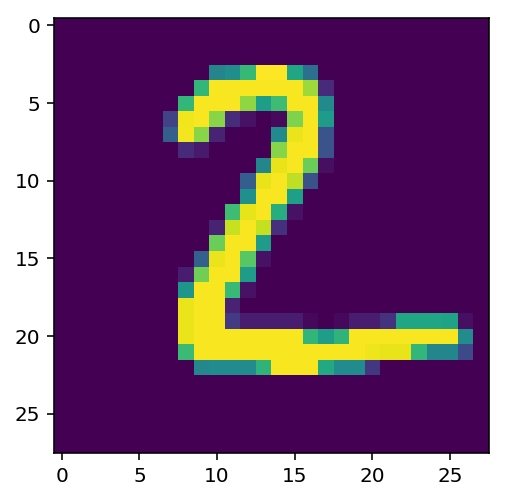

In [83]:
print(model.predict_classes(x_test[1:2], verbose=0))
plt.imshow(x_test[1].reshape(28, 28));

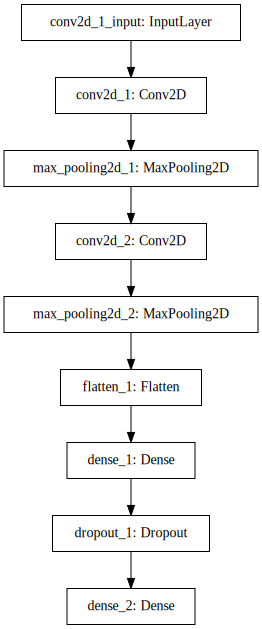

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))